In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:

df = pd.read_csv("../population_total.csv")
print(f'Loading dataset of dimensions {df.shape}')



Loading dataset of dimensions (197, 302)


In [28]:
countries = ['Portugal', 'France']
df_graph = df[df['country'].isin(countries)]
df_graph = df_graph.set_index('country')



In [29]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, France to Portugal
Columns: 301 entries, 1800 to 2100
dtypes: object(301)
memory usage: 4.7+ KB


In [30]:
df_graph = df_graph.T
df_graph.index = df_graph.index.astype(int)


In [31]:
df_graph.columns


Index(['France', 'Portugal'], dtype='object', name='country')

In [32]:
df_graph.head()

country,France,Portugal
1800,29M,2.75M
1801,29.1M,2.78M
1802,29.2M,2.8M
1803,29.3M,2.83M
1804,29.4M,2.85M


In [34]:
for country in countries:
    df_graph[country] = df_graph[country].apply(
        lambda x: float(x[:-1]) * 1_000_000 if isinstance(x, str) and x.endswith('M') else float(x)
    )

In [35]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   France    301 non-null    float64
 1   Portugal  301 non-null    float64
dtypes: float64(2)
memory usage: 7.1 KB


In [37]:
df_graph = df_graph / 1000000

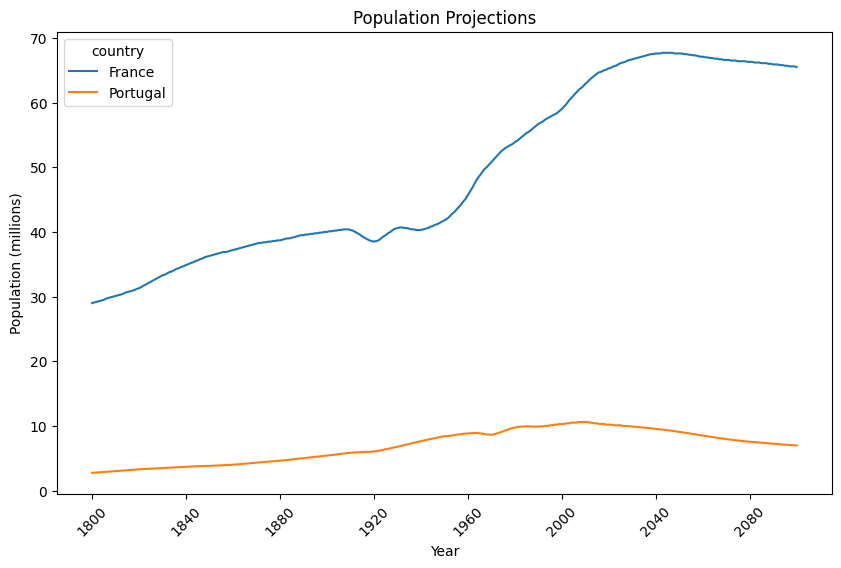

In [41]:

df_graph.plot(figsize=(10, 6))
plt.title("Population Projections")
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.xticks(range(1800, 2101, 40), rotation=45)
plt.savefig("pop.jpeg")
plt.show()
